## Problem Statement
Maccare Consultancy, a multinational corporation with a global workforce, prioritizes hiring top talent and keeping them in the organization for an extended period. The company invests considerable resources in various employee retention initiatives. The Head of People Operations aims to reduce the cost of employee retention and proposes a plan to restrict incentives to employees who are most likely to leave. As a newly recruited Data Scientist in the People Operations Department, you are tasked with analyzing employee data to identify characteristics common among those who have left the company. Your findings will be used to develop a model to predict the likelihood of an employee leaving, enabling targeted incentive programs to prevent attrition.

### Objective : 

As a Data Scientist at Maccare Consultancy, we are tasked with analyzing the data provided to identify the different factors that drive attrition, and build a model that can help to predict attrition.


### Dataset :
The data contains demographic details, work-related metrics and attrition flag.

* EmployeeNumber - Employee Identifier
* Attrition - Did the employee attrite?
* Department - Employee Department
* JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* MaritalStatus - Marital Status
* MonthlyIncome - Monthly Salary
* MonthlyRate - Data description not available**
* DistanceFromHome - Distance from work to home (in km)
* Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* EducationField - Field of Education
* EmployeeCount - Employee Count in a row
* Age - Age of the employee
* BusinessTravel - Travel commitments for the job
* DailyRate - Data description not available**
* EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* Gender - Employee's gender'
* PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* StandardHours - Standard Hours
* StockOptionLevel - Stock Option Level
* TotalWorkingYears - Total years worked
* TrainingTimesLastYear - Number of training attended last year
* WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* YearsAtCompany - Years at Company
* YearsInCurrentRole - Years in the current role
* YearsSinceLastPromotion - Years since the last promotion
* YearsWithCurrManager - Years with the current manager
* HourlyRate - Data description not available**
* JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
* JobLevel - Level of job (1 to 5)
* JobRole - Job Roles
* NumCompaniesWorked - Number of companies worked at
* Over18 - Over 18 years of age?
* OverTime - Overtime?
* PercentSalaryHike - The percentage increase in salary last year


#### Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Freelance/hr_attrition/HR_Employee_Attrition-1.csv")

## Overview of the dataset

In [ ]:
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.tail()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8
2939,2940,No,34,Travel_Rarely,628,Research & Development,8,3,Medical,1,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
data.shape

(2940, 35)

* The dataset has 2940 rows and 35 columns of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

**Observations -**
* There are no null values in the dataset.
* We can convert the object type columns to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

In [ ]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            2940 non-null   int64   
 1   Attrition                 2940 non-null   category
 2   Age                       2940 non-null   int64   
 3   BusinessTravel            2940 non-null   category
 4   DailyRate                 2940 non-null   int64   
 5   Department                2940 non-null   category
 6   DistanceFromHome          2940 non-null   int64   
 7   Education                 2940 non-null   int64   
 8   EducationField            2940 non-null   category
 9   EmployeeCount             2940 non-null   int64   
 10  EnvironmentSatisfaction   2940 non-null   int64   
 11  Gender                    2940 non-null   category
 12  HourlyRate                2940 non-null   int64   
 13  JobInvolvement            2940 non-null   int64 

`we can see that the memory usage has decreased from 804 KB to 624.4 KB`, this technique is generally useful for bigger datasets.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeCount,2940.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0


- The EmployeeNumber serves only as an identification variable and has no significance for predictive modeling purposes.

- The age range of employees is between 18 and 60 years old, with an average age of 36 years.

- Since EmployeeCount has a constant value of 1 across all rows, it can be excluded from our analysis since it does not provide any valuable information.

- Standard Hours has a constant value of 80 across all rows, which is not informative for our analysis and can be removed.

- Although the Hourly rate has a wide range, its purpose is not yet clear. The same applies to the daily and monthly rates.

- The Monthly Income has a large range, and the disparity between the mean and median suggests that outliers may be present.

In [ ]:
data.describe(include=['category']).T

,count,unique,top,freq
Attrition,2940,2,No,2466
BusinessTravel,2940,3,Travel_Rarely,2086
Department,2940,3,Research & Development,1922
EducationField,2940,6,Life Sciences,1212
Gender,2940,2,Male,1764
JobRole,2940,9,Sales Executive,652
MaritalStatus,2940,3,Married,1346
Over18,2940,1,Y,2940
OverTime,2940,2,No,2108


- Our objective variable is attrition, and we have observed that 84% of the records indicate that employees will not leave the organization.
- The business travel needs of most employees are minimal.
- The majority of employees belong to the Research and Development department.
- Since all employees are above 18 years of age, we can eliminate this variable as it will not contribute to our analysis.
- The number of male employees exceeds that of female employees.

**Dropping columns which are not adding any information.**

In [ ]:
data.drop(['EmployeeNumber','EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

In [ ]:
cols_cat= data.select_dtypes(['category'])

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Attrition are :
No     2466
Yes     474
Name: Attrition, dtype: int64
**************************************************
Unique values in BusinessTravel are :
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
**************************************************
Unique values in Department are :
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
**************************************************
Unique values in EducationField are :
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
**************************************************
Unique values in Gender are :
Male      1764
Female    1176
Name: Gender, dtype: int64
**************************************************
Unique values in JobRole are :
Sales Ex

In [ ]:
df = data.copy()

## Exploratory Data Analysis (EDA) 

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Univariate analysis

- We are doing univariate analysis to understand the distribution of the features as there are higher chances that the features have skewness and are not normal so this can be handled only once we visualize the data
- Box plot and histograms are done to look for the distribution of a variable along the axis and to also check for the presence of outliers in the data. These boxplots show if a particular feature has higher number of outliers or if they are less so that outlier treatment can eb done on those features.
- labelled barplot is also being done as univariate analysis so that categorical variables can be visualized and observed how they are distributed among different classes and also to analyze if a particular feature has only one class and the requirement for removal of this feature as that may lead to overfitting.

### Observations on Age

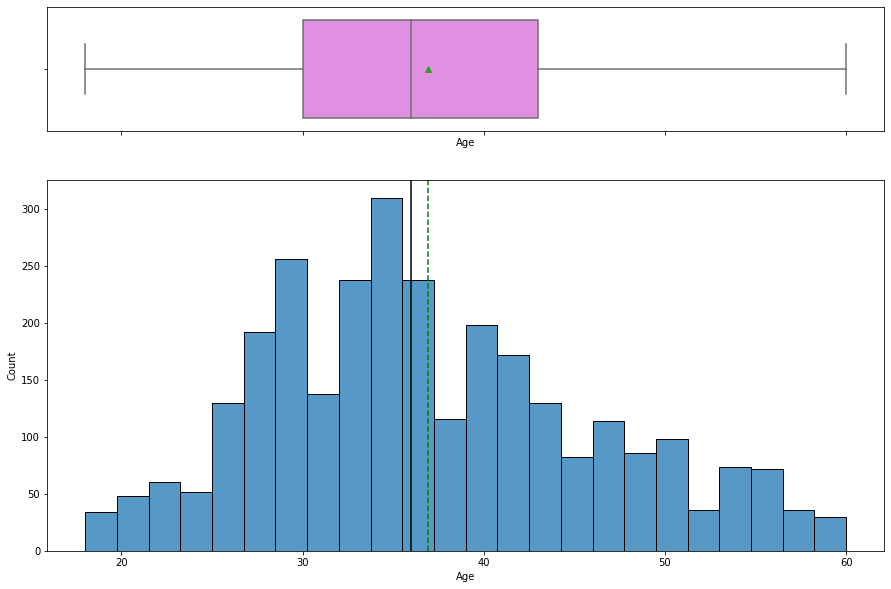

In [ ]:
histogram_boxplot(df,'Age')

* Age is looking normally distributed, with a hint of right skew.

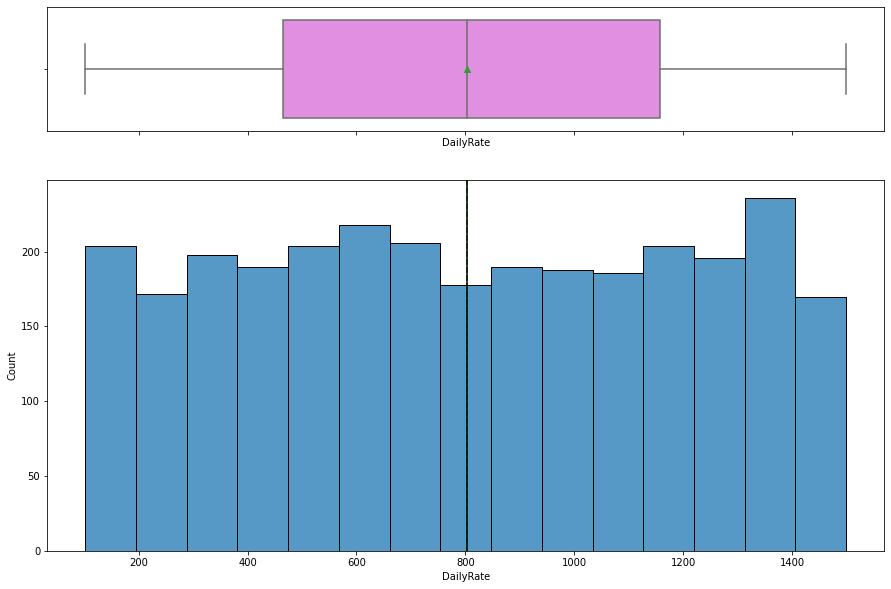

In [ ]:
histogram_boxplot(df,'DailyRate')

* The daily rate has a fairly uniform distribution with a mean and median at 800.

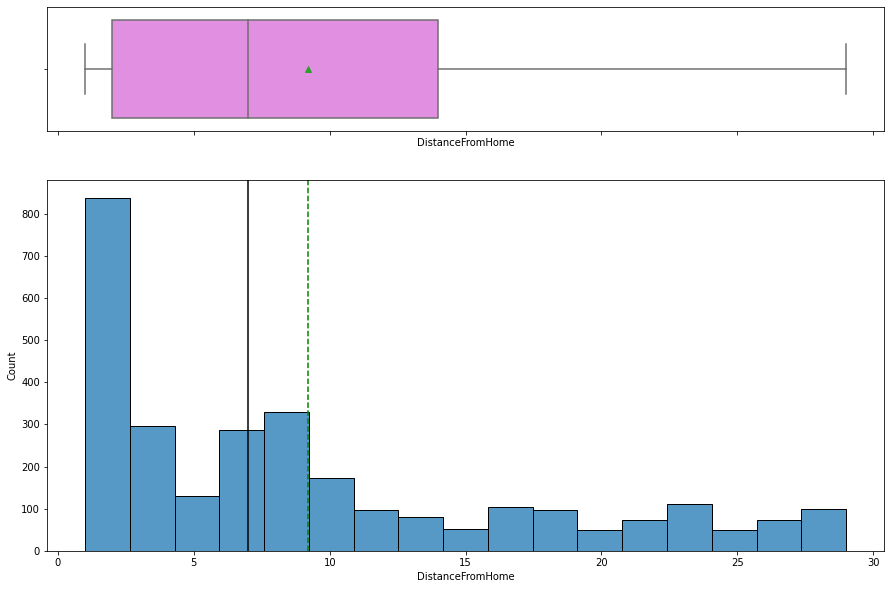

In [ ]:
histogram_boxplot(df,'DistanceFromHome')

* This is a right-skewed distribution.
* Most people live close to work but we do have some employees that live at a distance.

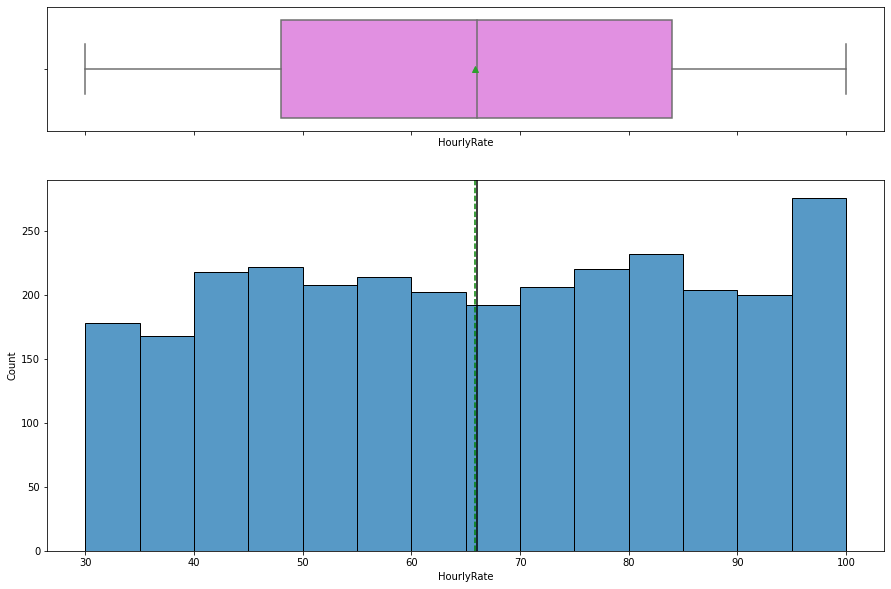

In [ ]:
histogram_boxplot(df,'HourlyRate')

* Quite inline with the daily rate, the hourly rate is also fairly uniformly distributed with mean and median at 65.

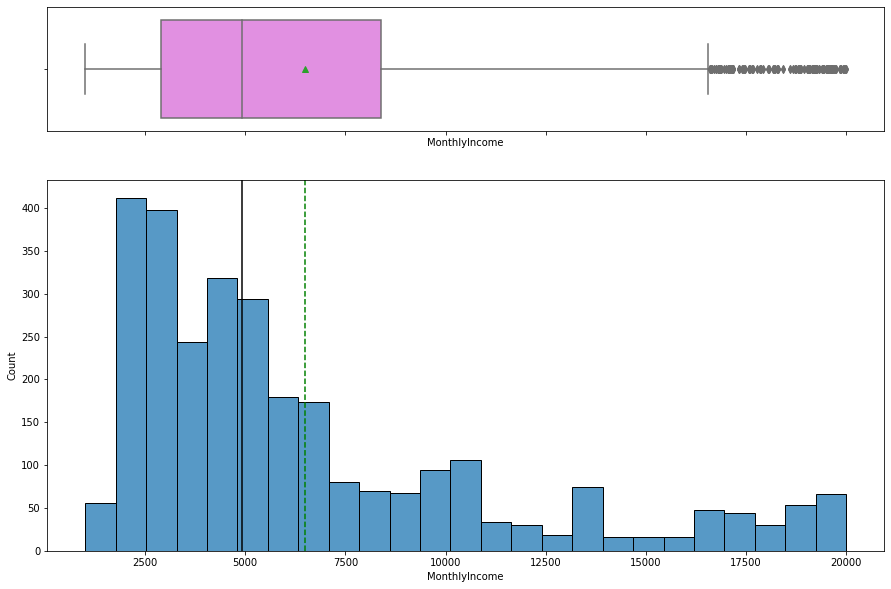

In [ ]:
histogram_boxplot(df,'MonthlyIncome')

* Income distribution across a unit is almost always right-skewed and similar is the case here.
* As expected, from the boxplot we can see that there are a few outliers who earn much higher than the rest of the employees.

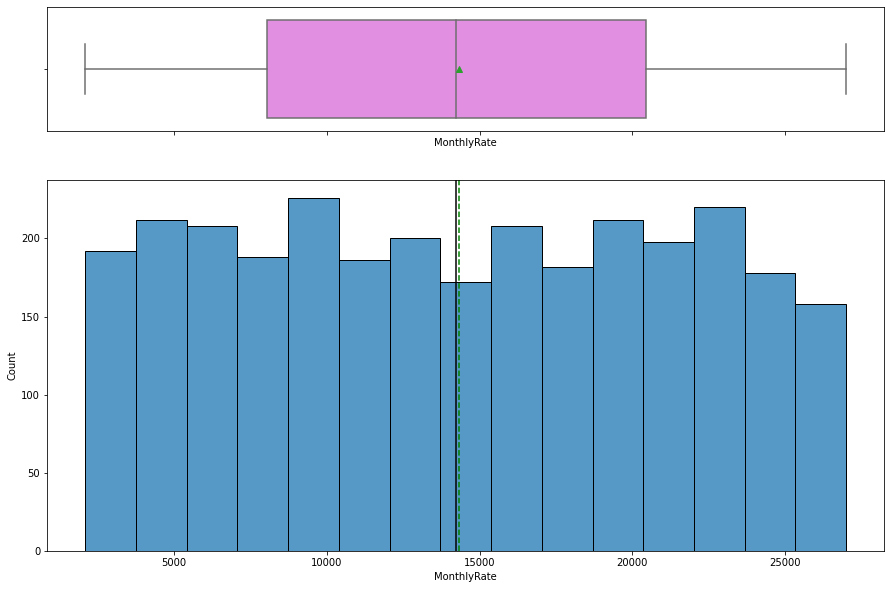

In [ ]:
histogram_boxplot(df,'MonthlyRate')

* Monthly rate also has a uniform distribution with mean and median close to 14500.

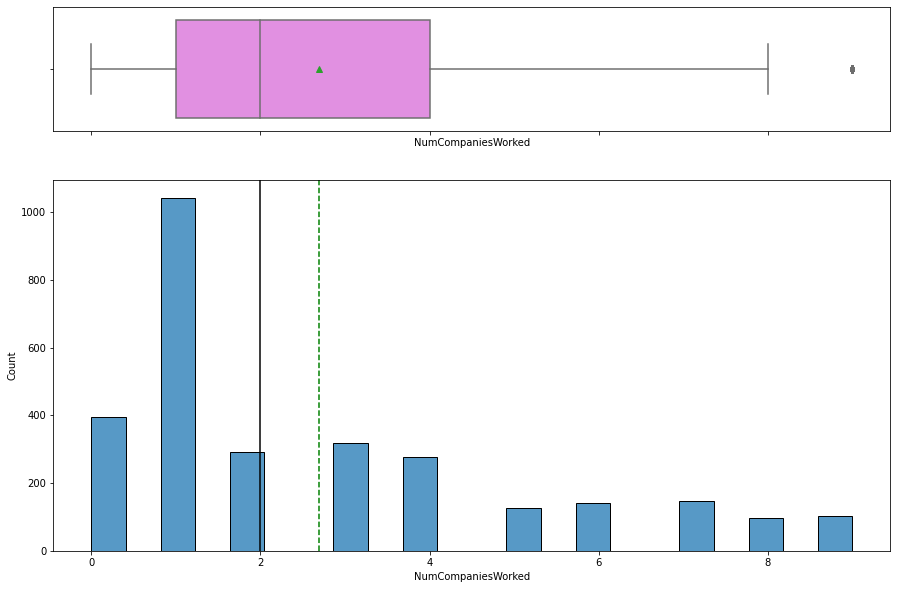

In [ ]:
histogram_boxplot(df,'NumCompaniesWorked')

* On average, people have worked at 2.5 companies. Median is 2.
* Most people have worked at only 1 company.
* Nearly 350 employees have worked at 0 companies, clearly this means this variable indicates the number of companies worked at before joining ours.
* There is an outlier employee who has changed 9 companies.

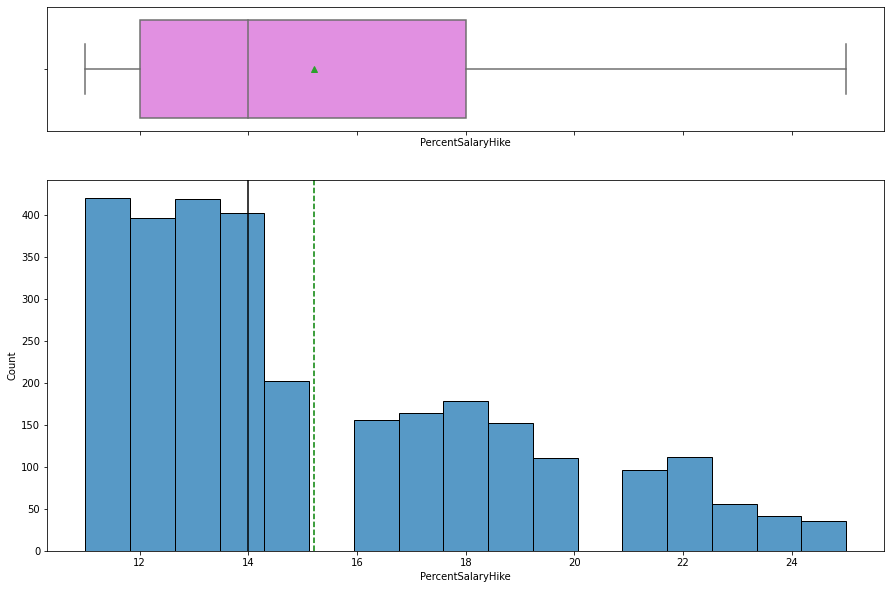

In [ ]:
histogram_boxplot(df,'PercentSalaryHike')

* Salary hike is Right skewed. We shall check later if the hike percentage is a function of performance rating or job level. 
* Mean percentage salary hike is 15%.

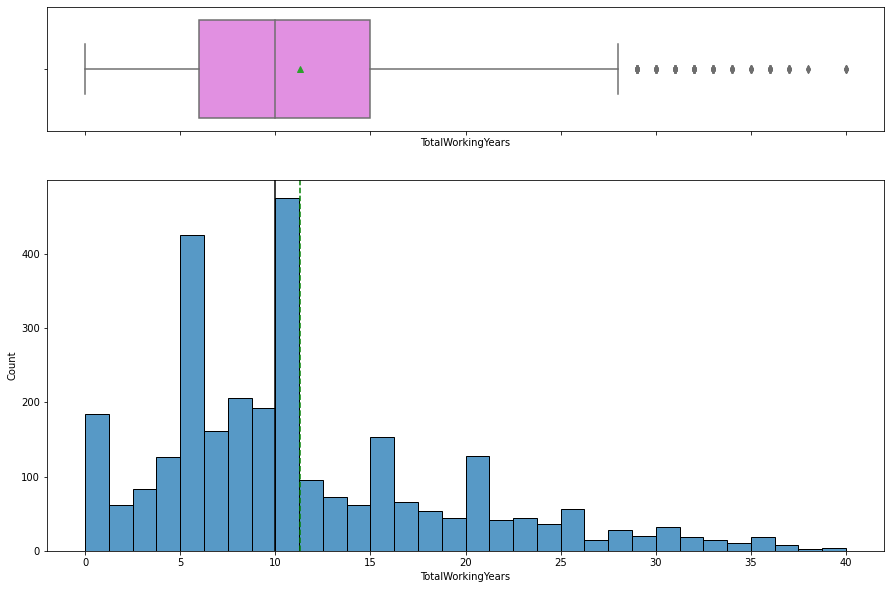

In [ ]:
histogram_boxplot(df,'TotalWorkingYears')

* Age of the employees had a hint of right skew but work experience has a significant right skew.
* From the boxplot, we can observe that this variable contains a few outliers also.

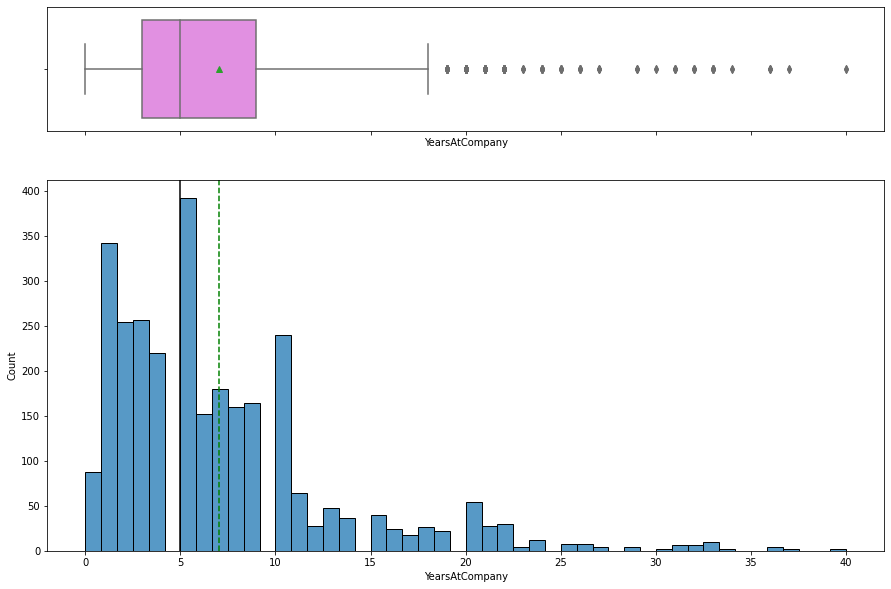

In [ ]:
histogram_boxplot(df,'YearsAtCompany')

* Significant right skew in the data.
* The outliers are probably the most loyal employees and it suggests that they would be less likely to attrite.

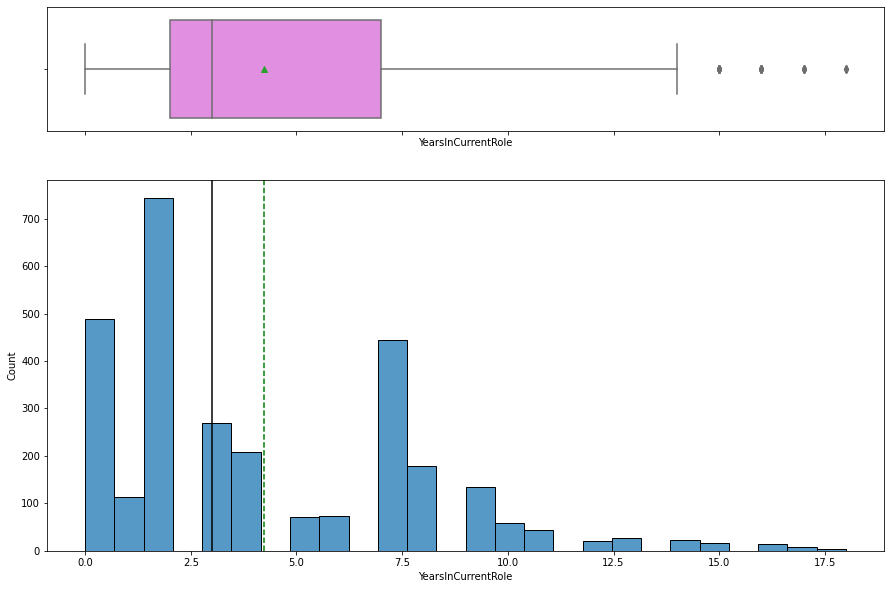

In [ ]:
histogram_boxplot(df,'YearsInCurrentRole')

* This distribution has three peaks at 0, 2, and 7.
* There are a few outliers that have stayed in the same role for more than 15 years.

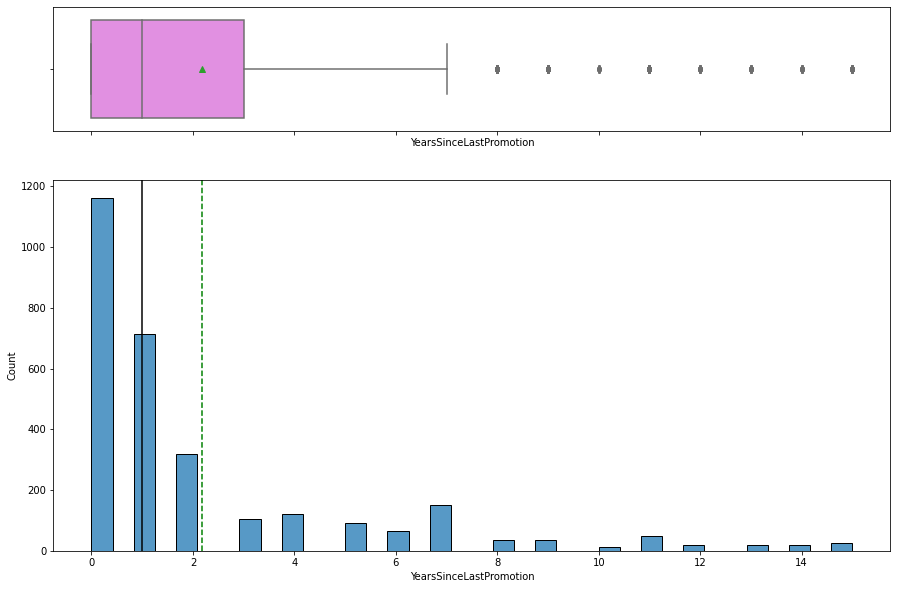

In [ ]:
histogram_boxplot(df,'YearsSinceLastPromotion')

* There are a few outliers in this right-skewed distribution, these are probably the people at the highest positions.
* Most employees have had a promotion in the last 2 years. 
* 0 years since last promotion indicates many employees were recently promoted.

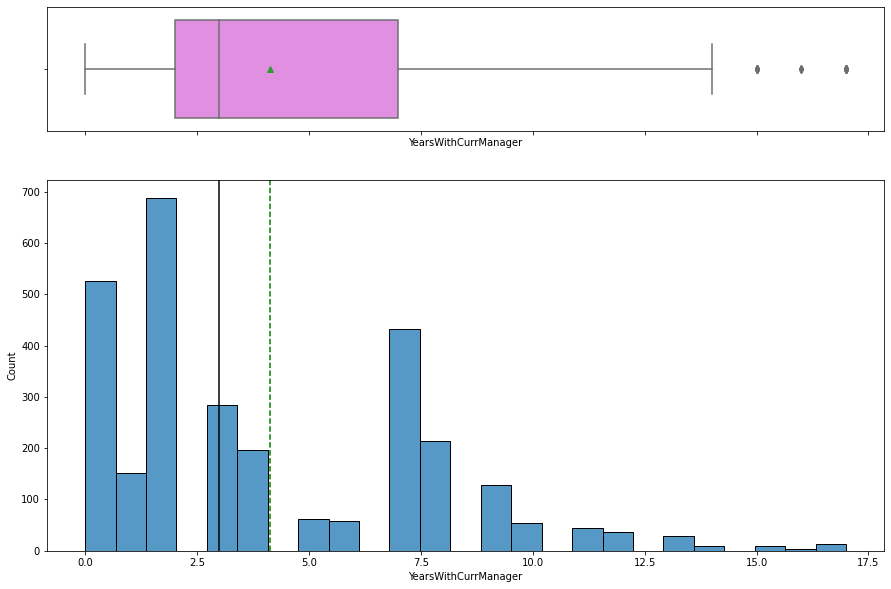

In [ ]:
histogram_boxplot(df,'YearsWithCurrManager')

* This distribution is very similar to that of 'Years in current role' and that makes sense.
* There are a few outliers in this variable. 

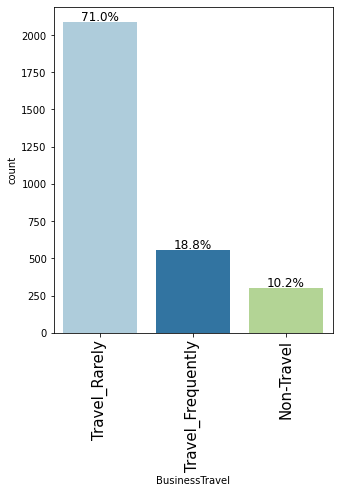

In [ ]:
labeled_barplot(df, "BusinessTravel", perc=True)

* 71% of the employees have travel rarely and 18.8% employees have to travel frequently.

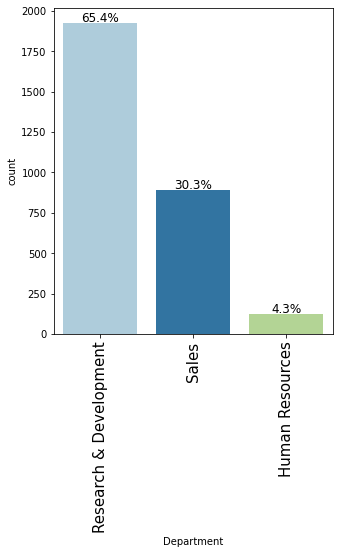

In [ ]:
labeled_barplot(df, "Department", perc=True)

* 65.4% of employees in data are from R&D department followed by 30.3% in sales.

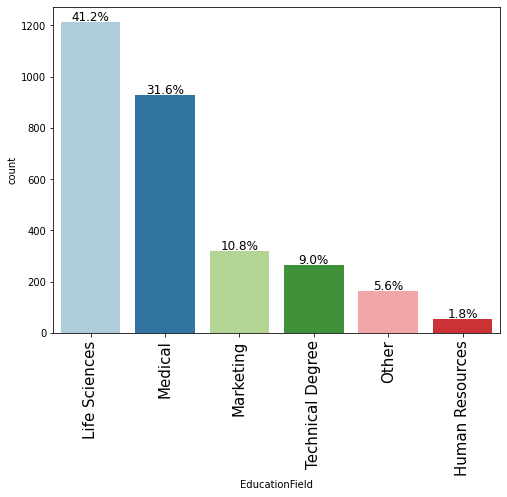

In [ ]:
labeled_barplot(df, "EducationField", perc=True)

* 41.2% of the employees are from a Life Sciences background followed by 31.6% from a medical background.

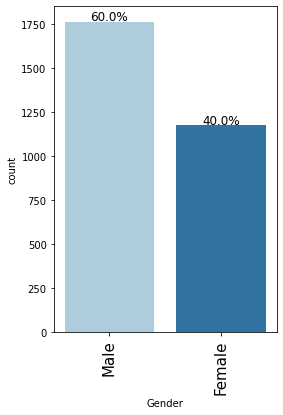

In [ ]:
labeled_barplot(df, "Gender", perc=True)

* 60% of male employees and 40% of female employees.

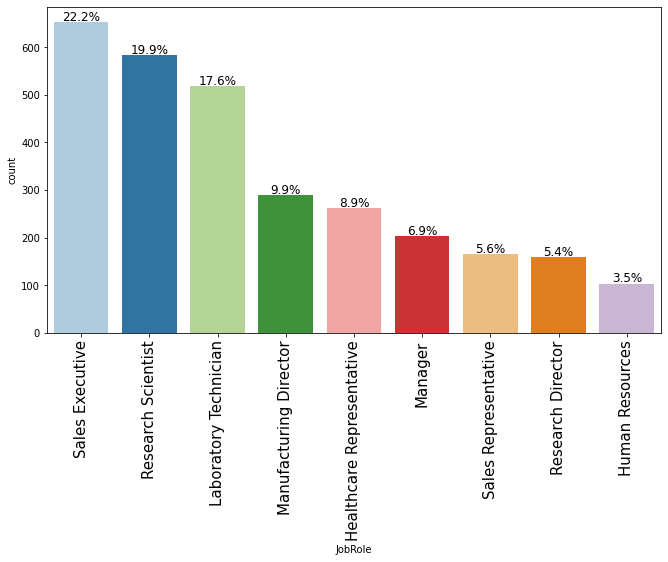

In [ ]:
labeled_barplot(df, "JobRole", perc=True)

* 22.2% of employees are Sales Executives followed by 20% of Research Scientists.

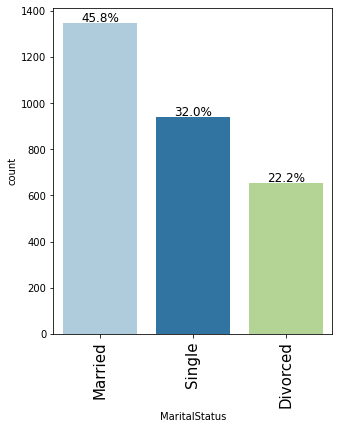

In [ ]:
labeled_barplot(df, "MaritalStatus", perc=True)

* 45.8% of the employees are married followed by 32% singles.

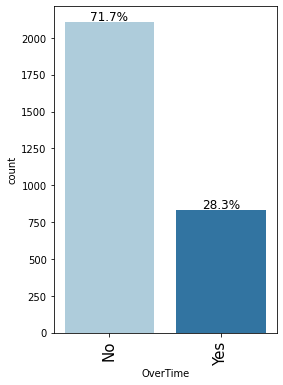

In [ ]:
labeled_barplot(df, "OverTime", perc=True)

* 71.7% of the employees are not ready to work over time.

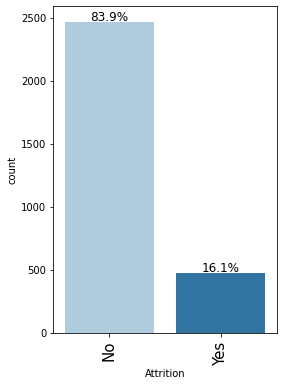

In [ ]:
labeled_barplot(df, "Attrition", perc=True)

* 16% of the data points represent the employees who are going to attrite.

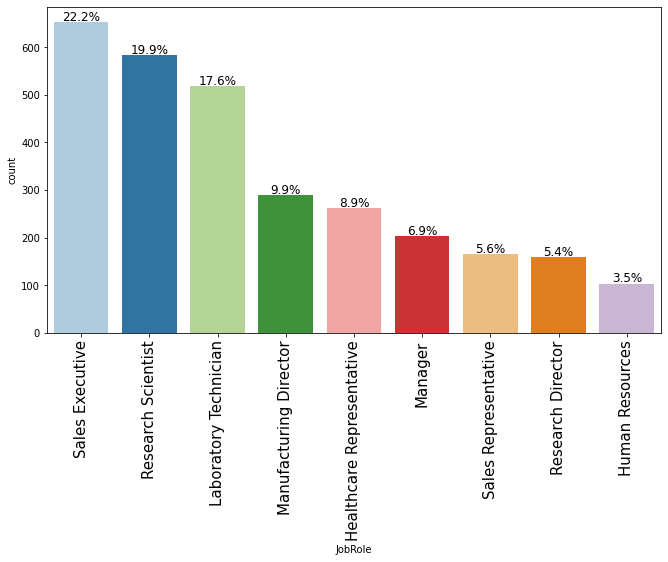

In [ ]:
labeled_barplot(data, "JobRole", perc=True)

* 22.2% of employees are Sales Executives followed by 20% of Research Scientists.

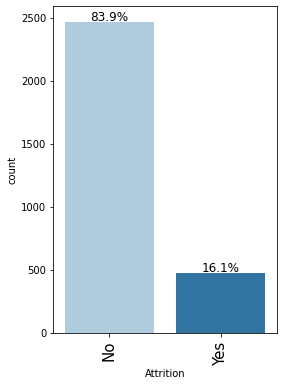

In [ ]:
labeled_barplot(data, "Attrition", perc=True)

* 16% of the data points represent the employees who are going to attrite.

## Bivariate Analysis

We are also doing bivariate analysis on our data.
- We would plot correlation heatmap to check if there are are any correlations between independent variables and we can also have a check on to see if there is any strong correlation between any independent features and a dependent feature.
- We would also use pairplots to check if there are any relations between different variables in our data.
- We would also use boxplots to check for outliers in the data and visualize the outliers.

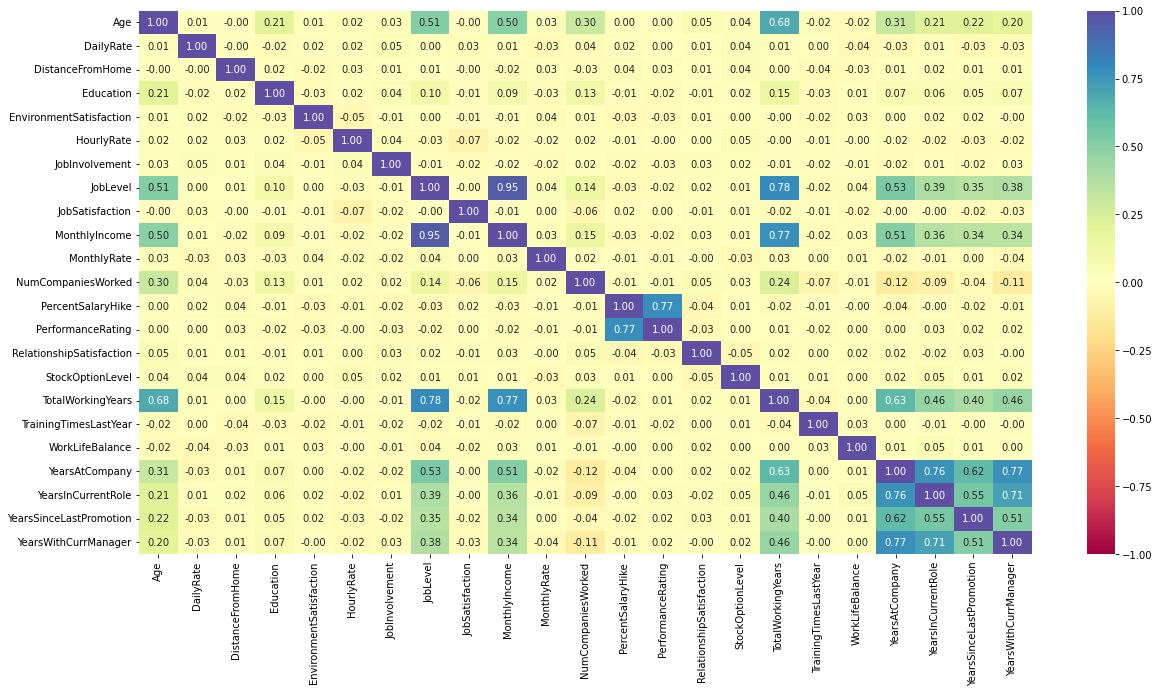

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

- Several variables show correlation, but there are no unexpected findings.
- It is predictable that TotalWorkingYears has a strong correlation with Job Level, indicating that a higher level is often attained after working for a longer period.
- There is no correlation between HourlyRate, DailyRate, and MonthlyRate, making it difficult to interpret the meaning of these variables.
- Job Level and MonthlyIncome are highly correlated, indicating that higher-paying positions are often associated with higher levels.
- Age has a positive correlation with JobLevel and Education, suggesting that older employees tend to be more educated and occupy higher positions.
- None of the numerical values exhibit a correlation with Work-life Balance.

In [ ]:
sns.pairplot(df,hue='Attrition')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

* We can see varying distributions in features for Attrition, we can investigate it further.

### Attrition vs Earnings of employee

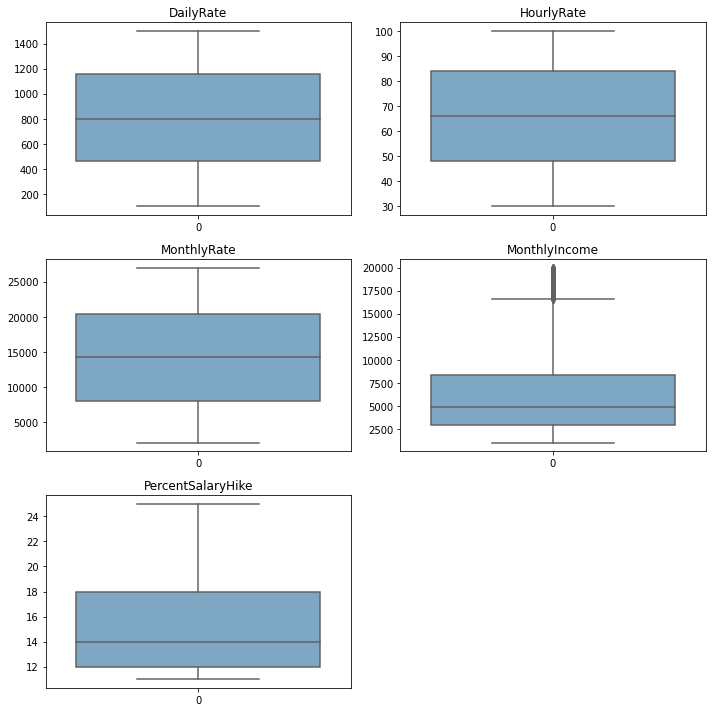

In [ ]:
cols = df[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome','PercentSalaryHike']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- Workers who receive a lower daily rate and earn a comparatively lower monthly wage exhibit a higher tendency to leave their jobs.
- The monthly and hourly rates of payment do not appear to impact employee attrition rates.
- A lower salary increase is also a contributing factor to attrition.

### Attrition vs Years working in company

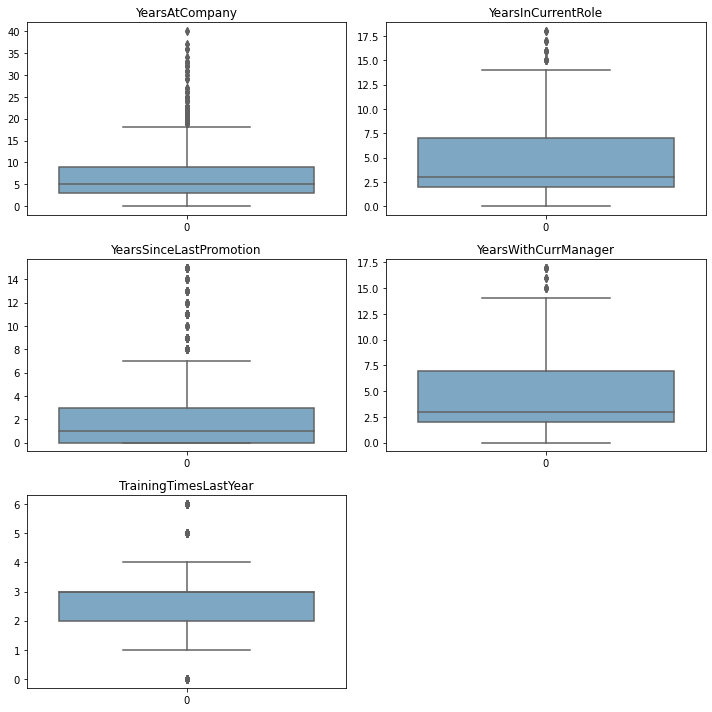

In [ ]:
cols = df[['YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','TrainingTimesLastYear']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Those employees who have spent less time at a company, in a current role or with a manager have higher chances of attrition.


### Attrition vs Previous job roles

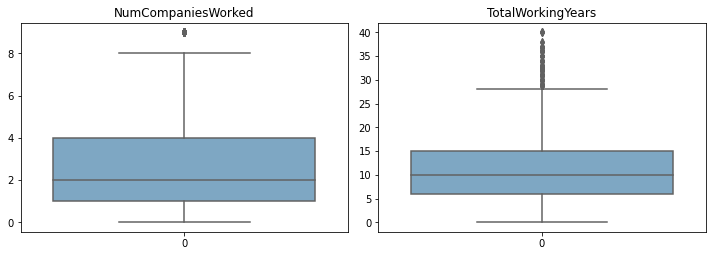

In [ ]:
cols = df[['NumCompaniesWorked','TotalWorkingYears']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Employees who have worked in more companies generally tend to switch more jobs hence attriting.
* Employees who attrite generally have lesser years of experience.

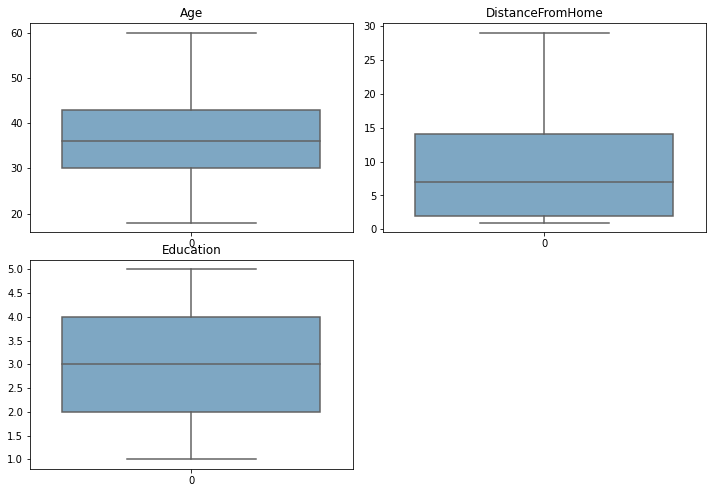

In [ ]:
cols = df[['Age','DistanceFromHome','Education']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Employees who have to travel a more distance from their home attrite more.
* There is no difference in age and education of attriting and non-attriting employees.

Attrition            No  Yes   All
BusinessTravel                    
All                2466  474  2940
Travel_Rarely      1774  312  2086
Travel_Frequently   416  138   554
Non-Travel          276   24   300
------------------------------------------------------------------------------------------------------------------------


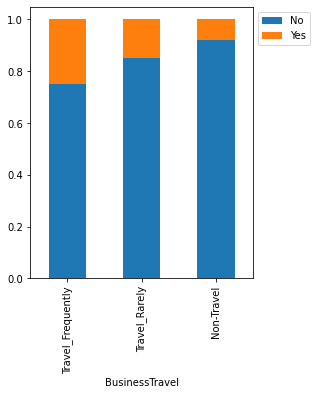

In [ ]:
stacked_barplot(df, "BusinessTravel", "Attrition")

* As the travel frequency increases, the Attrition rate increases.
* There's ~22% probability of employees attriting who travel frequently.

Attrition                 No  Yes   All
Department                             
All                     2466  474  2940
Research & Development  1656  266  1922
Sales                    708  184   892
Human Resources          102   24   126
------------------------------------------------------------------------------------------------------------------------


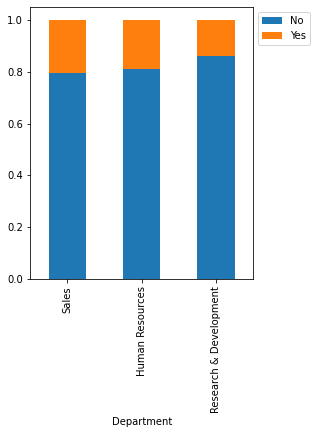

In [ ]:
stacked_barplot(df, "Department", "Attrition")

* We saw earlier that majority of the employees work for the R&D department. The probability of attrition is least there.
* Both HR and sales have similar Attrition probability.

Attrition           No  Yes   All
EducationField                   
All               2466  474  2940
Life Sciences     1034  178  1212
Medical            802  126   928
Marketing          248   70   318
Technical Degree   200   64   264
Other              142   22   164
Human Resources     40   14    54
------------------------------------------------------------------------------------------------------------------------


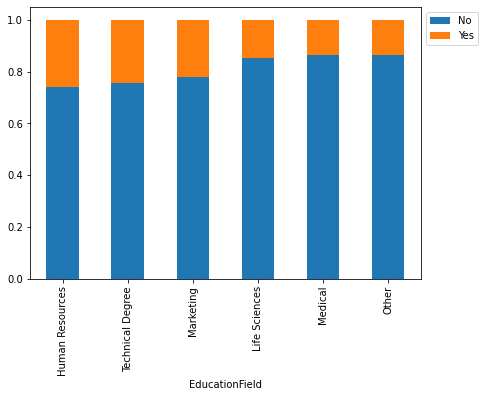

In [ ]:
stacked_barplot(df,"EducationField","Attrition")

- One-fourth of the human resources educated workforce leave the company.
- Marketing and technical degree holders are also at a high risk of attrition.

Attrition                  No  Yes   All
EnvironmentSatisfaction                 
All                      2466  474  2940
1                         424  144   568
3                         782  124   906
4                         772  120   892
2                         488   86   574
------------------------------------------------------------------------------------------------------------------------


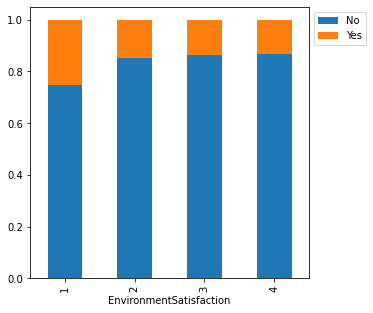

In [ ]:
stacked_barplot(df,"EnvironmentSatisfaction","Attrition")

- Workers who express dissatisfaction with their workplace are more likely to leave their job voluntarily.
- Employees who rate their work environment poorly have a chance of approximately 40% to leave the company.

Attrition         No  Yes   All
JobInvolvement                 
All             2466  474  2940
3               1486  250  1736
2                608  142   750
1                110   56   166
4                262   26   288
------------------------------------------------------------------------------------------------------------------------


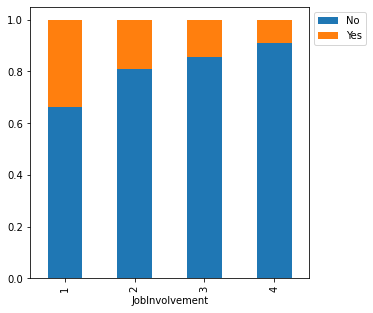

In [ ]:
stacked_barplot(df,"JobInvolvement","Attrition")

- The level of Job Involvement appears to be a highly significant predictor of employee turnover.
- When employees have high levels of job involvement, their likelihood of leaving the company decreases.
- Employees who rate their job involvement as 0 or 1 have a probability of around 55% of leaving the company.
- Conducting additional research to gain a better understanding of how this variable was measured could provide more valuable insights.

Attrition    No  Yes   All
JobLevel                  
All        2466  474  2940
1           800  286  1086
2           964  104  1068
3           372   64   436
4           202   10   212
5           128   10   138
------------------------------------------------------------------------------------------------------------------------


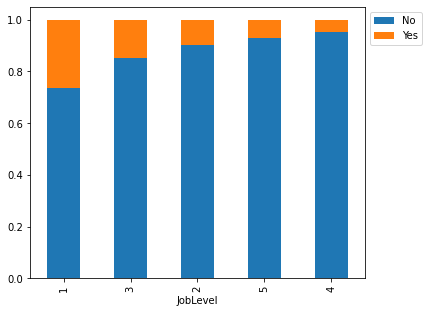

In [ ]:
stacked_barplot(df,"JobLevel","Attrition")

* The trend is not very clear here, but it is visible that people at lower job levels are more likely to leave.

Attrition                    No  Yes   All
JobRole                                   
All                        2466  474  2940
Laboratory Technician       394  124   518
Sales Executive             538  114   652
Research Scientist          490   94   584
Sales Representative        100   66   166
Human Resources              80   24   104
Manufacturing Director      270   20   290
Healthcare Representative   244   18   262
Manager                     194   10   204
Research Director           156    4   160
------------------------------------------------------------------------------------------------------------------------


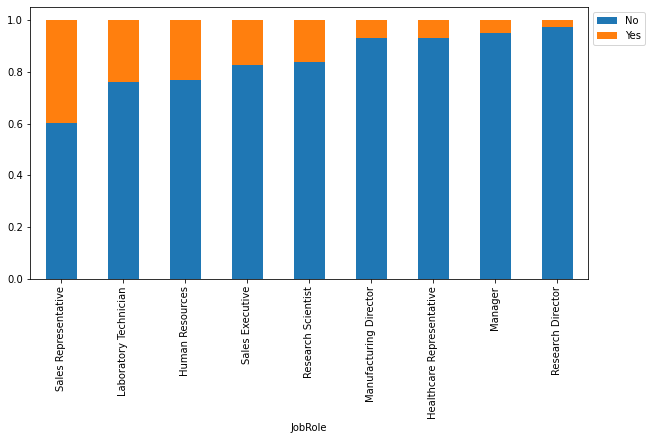

In [ ]:
stacked_barplot(df,"JobRole","Attrition")

- More than 40% of Sales Executives are likely to leave the company.
- Laboratory Technicians and Human Resource staff are also at risk of leaving the company at a high rate.
- Compared to the average attrition probability of 16%, the likelihood of attrition among Research Directors, Manufacturing Directors, Healthcare 
- Representatives, and Managers is significantly lower.

Attrition          No  Yes   All
JobSatisfaction                 
All              2466  474  2940
3                 738  146   884
1                 446  132   578
4                 814  104   918
2                 468   92   560
------------------------------------------------------------------------------------------------------------------------


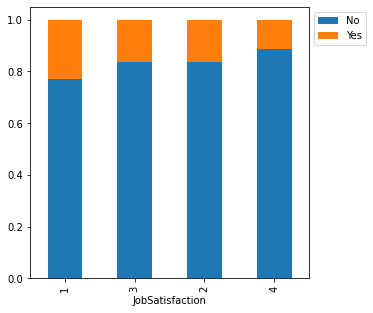

In [ ]:
stacked_barplot(df,"JobSatisfaction","Attrition")

* As Job satisfaction increases, attrition probability decreases. 

Attrition        No  Yes   All
MaritalStatus                 
All            2466  474  2940
Single          700  240   940
Married        1178  168  1346
Divorced        588   66   654
------------------------------------------------------------------------------------------------------------------------


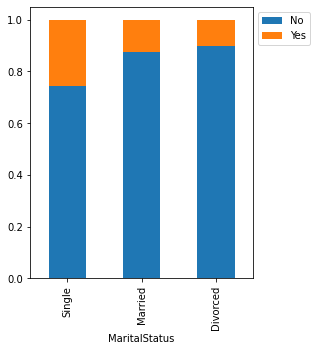

In [ ]:
stacked_barplot(df,"MaritalStatus","Attrition")

* Singles attrite more than married and divorced employees.
* One of the reasons here can be that single employees are younger and tend to explore different jobs.

Attrition    No  Yes   All
OverTime                  
All        2466  474  2940
Yes         578  254   832
No         1888  220  2108
------------------------------------------------------------------------------------------------------------------------


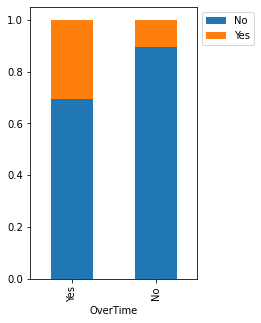

In [ ]:
stacked_barplot(df,"OverTime","Attrition")

* Employees who work overtime tend to attrite more.
* There a ~35% probability of attrition among employees working overtime.

Attrition                   No  Yes   All
RelationshipSatisfaction                 
All                       2466  474  2940
3                          776  142   918
4                          736  128   864
1                          438  114   552
2                          516   90   606
------------------------------------------------------------------------------------------------------------------------


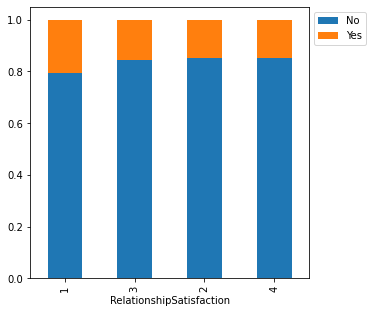

In [ ]:
stacked_barplot(df,"RelationshipSatisfaction","Attrition")

* Low relationship satisfaction rating does indicate more probability of attrition, but we need to investigate further which relationships do this variable indicate.

Attrition           No  Yes   All
StockOptionLevel                 
All               2466  474  2940
0                  954  308  1262
1                 1080  112  1192
3                  140   30   170
2                  292   24   316
------------------------------------------------------------------------------------------------------------------------


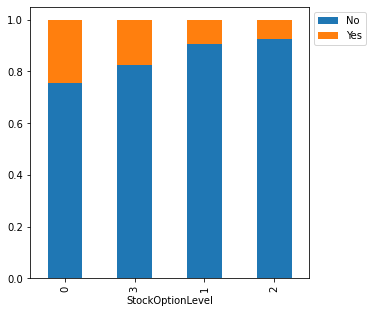

In [ ]:
stacked_barplot(df,"StockOptionLevel","Attrition")

* ~22% Employees with highest and lowest stock options attrite the more than others.
* Company should investigate more on why employees with highest stock options are attriting and take this as an opportunity to re-consider their stocks policy. As assumption would be if the employees require more inhand salary as compared to stock options

Attrition          No  Yes   All
WorkLifeBalance                 
All              2466  474  2940
3                1532  254  1786
2                 572  116   688
4                 252   54   306
1                 110   50   160
------------------------------------------------------------------------------------------------------------------------


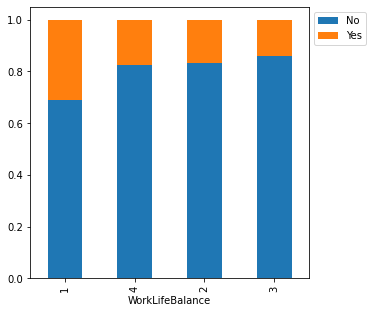

In [ ]:
stacked_barplot(df,"WorkLifeBalance","Attrition")

* Low work-life balance rating leads people to attrite, this is a good factor to preempt at attrition risk employees.

**Checking if performace rating and salary hike are related-**

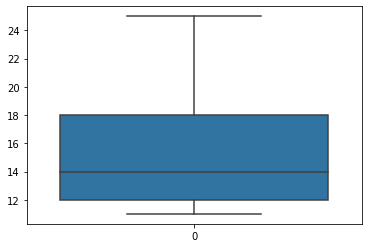

In [ ]:
sns.boxplot(df['PercentSalaryHike'])
plt.show()

### <b>Summary of EDA</b>
**Data Description:**

- The dataset contains 2940 data rows and 35 columns.
- No missing values exist in the dataset.
- Attributes such as Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, and OverTime are classified as object data type, while the rest are classified as integer data type.

**Data Cleaning:**

- The variable EmployeeNumber serves as an identifier but does not provide any value in predictive modeling.
- EmployeeCount holds a constant value of 1 across all rows, making it redundant and irrelevant to the analysis.
- Standard Hours also contains the same value (80) in all rows, rendering it uninformative for our analysis and can be excluded.
- Since every employee in the dataset is above the age of 18, the Over18 variable only contains values of 1 and has been eliminated from consideration.

**Observations from EDA:**

* `age`: The age variable follows a normal distribution, and its mean value is 37 years. Additionally, there exists a positive correlation between age and job level and education, indicating that individuals at higher job levels and with higher levels of education tend to be older.
* `DailyRate`: The data shows a relatively even spread with a mean value of 800. Individuals who earn lower daily rates and receive lower monthly salaries tend to have a higher likelihood of leaving their job.
* `DistanceFromHome`: This shows a right-skewed distribution. Most people stay at a close distance from home with few also leaving away from work. Employees who have to travel a more distance from their home attrite more.
* `HourlyRate`: It is an almost uniformly distributed variable. It has mean and median approx equal to 65. The hourly rate doesn't have much impact on attrition.
* `MonthlyIncome`: The distribution of monthly income displays a notable rightward skew, indicating that a small number of employees earn significantly more than the majority. Furthermore, it appears that job level is highly correlated with monthly income, with a correlation coefficient of 0.95. 
* `MonthlyRate`: It is a uniformly distributed variable with a median close to 14500. The monthly rate doesn't have much impact on attrition.
* `NumCompaniesWorked`: According to the data, the typical individual has held jobs at 2.5 companies, while the median number of companies worked for is 2. Notably, a significant proportion of people have only worked for a single company. It was found that around 350 people are new to the workforce, commonly referred to as "freshers." Meanwhile, a few employees have a more extensive work history, having worked at up to 9 different companies, which could be considered outliers.
* `PercentSalaryHike`:  It has a right-skewed distribution. It is correlated with performance rating with a coefficient of 0.77. Lesser salary hike also contributes to attrition.
* `TotalWorkingYears`: Work experience is having a significant right skew. It also contains few outliers.
* `YearsAtCompany`: Significantly skewed towards the right. Also contains outliers.
* `YearsInCurrentRole`: It is having few outliers. The lower whisker coincides with the first quartile.
* `YearsWithCurrManager`: A significant proportion of employees (around 71%) report traveling infrequently, while a smaller fraction (about 19%) travel more often. It has been observed that employees who travel frequently are more likely to experience attrition. Specifically, there is a probability of around 22% that employees who travel frequently will leave the company.
* `Department`: The R&D department consists of almost 65% of employees.
* `EducationField`:People with Life science background is dominant over others with almost 41% count.
* `Gender`: 60% of people are male while the rest are female.
* `JobRole`: Almost 22% of people are sales executives followed by 20% research scientists.
* `MaritalStatus`: Almost 46% of people are married and 32% are single.
* `OverTime`: Just under one-third of individuals are willing to work overtime, according to recent research. Workers who put in extra hours are more likely to leave their jobs, based on studies. Employees who work overtime have a probability of around 35% to experience attrition, according to statistical data.
* `Attrition`: There's an imbalance in the data with 16% of the employees attriting and rest not.

 

* **Attrition vs Earnings of employee**:
 - Workers with lower daily rates and monthly wages are at a higher risk of leaving their job voluntarily.
 - There appears to be no correlation between the monthly or hourly rate and the likelihood of employee turnover.
 - A smaller salary increase can also be a contributing factor to employee attrition.

* **Attrition vs Years working in company**
 - Employees who have a shorter tenure at a company, in their current role, or under a particular manager are more likely to leave.
 - It appears that training does not affect the rate of attrition.
    
* **Attrition vs Previous job roles**
 - Workers who have been employed at multiple companies are often more likely to change jobs frequently, resulting in higher attrition rates.
 - Employees with less work experience are typically more prone to attrition.

*  **Attrition vs Department, Job Role and Education**
 - The R&D department has the highest number of employees compared to other departments, and it appears that the likelihood of employees leaving is lower in this department.
 - The attrition probabilities for both the Sales and HR departments are similar.
Sales Executives have a high likelihood of attrition, with a probability exceeding 40%.
 - Laboratory Technicians and Human Resource personnel show a notable probability of leaving the organization.
 - The attrition probabilities for Research Directors, Manufacturing Directors, Healthcare Representatives, and Managers are considerably lower than the average probability of 16%.
 - About a quarter of employees who have an educational background in human resources tend to leave the organization.
 - Individuals with marketing and technical degrees also have a high likelihood of attrition.


- Employees who express dissatisfaction with their work environment are more likely to leave the company voluntarily.
- Employees with higher job involvement are more likely to remain with the company, while those with low job involvement have a higher likelihood of leaving (approximately 55% for those who rated 0 or 1). It would be beneficial to investigate the method used to measure this variable for further insights.
- Salary increases are determined by an employee's performance rating. It is important to investigate why employees who receive Excellent (3) and Outstanding (4) ratings leave the company and how they can be retained.

### Outlier detection

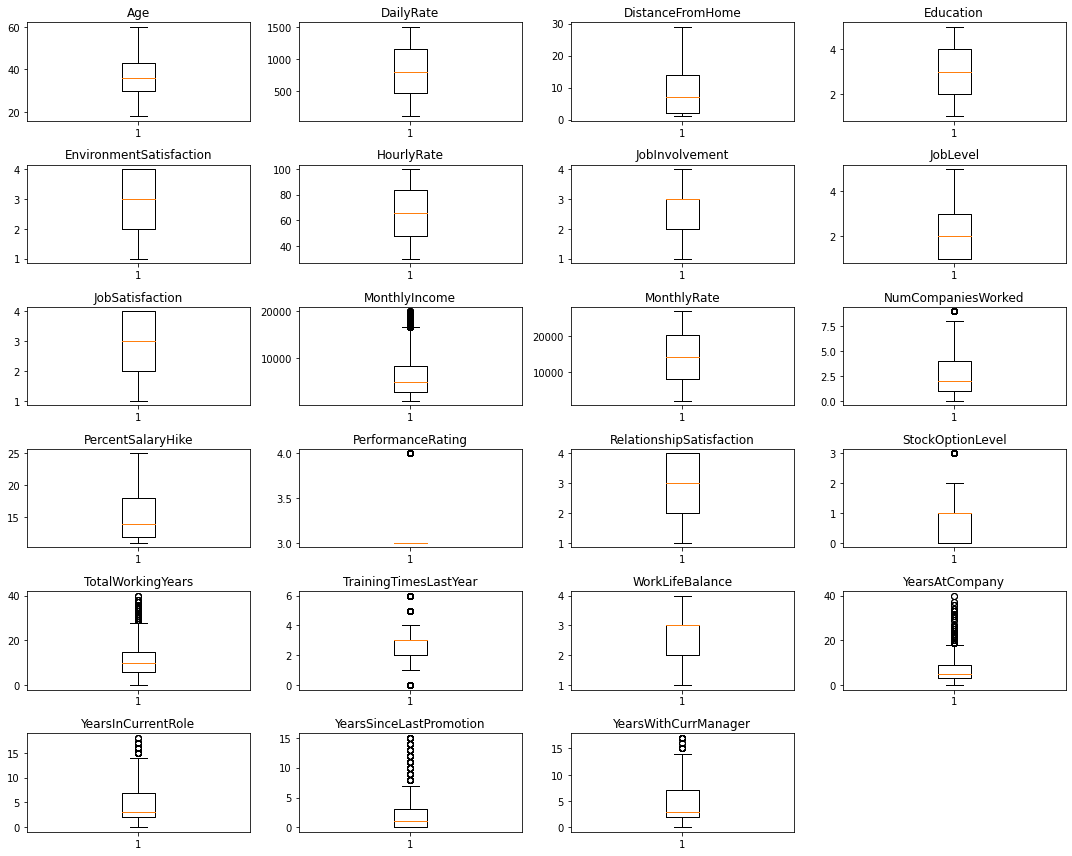

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are quite a few outliers in the data. Nonetheless, we will refrain from considering them as valid data points.